In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
apath_c_trn="cashew_mask/cnn/train/"
apath_c_tst="cashew_mask/cnn/test/"
apath_c_dep="cashew_mask/cnn/deploy/"

path_c_trn="cashew/cnn/train/"
path_c_tst="cashew/cnn/test/"
path_c_dep="cashew/cnn/deploy/"

(480, 465, 3)

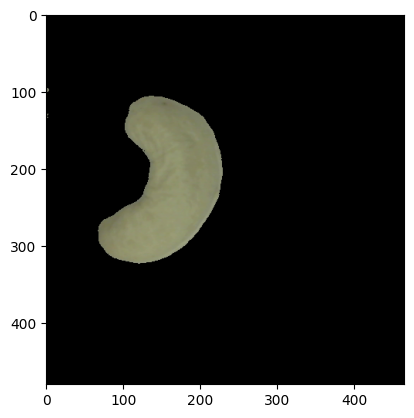

In [3]:
dog2 = cv2.imread(apath_c_trn+'320/2.png')
# dog2 = cv2.imread(path_c_trn+'320/2.png')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
plt.imshow(dog2)
dog2.shape

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest'
                              )

In [6]:
# trdata = ImageDataGenerator()
# traindata = trdata.flow_from_directory(directory=apath_c_trn,target_size=(224,224))
# tsdata = ImageDataGenerator()
# testdata = tsdata.flow_from_directory(directory=apath_c_tst, target_size=(224,224))

In [7]:
# width,height,channels
image_shape = (150, 150,3)

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(150, 150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=2, activation="softmax"))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
# #               loss=tf.keras.losses.categorical_crossentropy(),
# #               metrics=['accuracy'])

In [ ]:
# import keras
# from keras.optimizers import Adam
# opt = Adam(learning_rate=0.001)
# model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(apath_c_trn,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 640 images belonging to 2 classes.


In [14]:
test_image_gen = image_gen.flow_from_directory(apath_c_tst,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 320 images belonging to 2 classes.


In [15]:
train_image_gen.class_indices

{'320': 0, '400': 1}

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
results = model.fit_generator(generator=train_image_gen,
                              epochs=500,
                              steps_per_epoch=40,
                              validation_data=test_image_gen,
                              validation_steps=12)

Epoch 1/500
40/40 [==============================] - 7s 186ms/step - loss: 0.5496 - accuracy: 0.7203 - val_loss: 0.5523 - val_accuracy: 0.7083
Epoch 2/500
40/40 [==============================] - 7s 186ms/step - loss: 0.5315 - accuracy: 0.7312 - val_loss: 0.5073 - val_accuracy: 0.7604
Epoch 3/500
40/40 [==============================] - 8s 188ms/step - loss: 0.5100 - accuracy: 0.7469 - val_loss: 0.4734 - val_accuracy: 0.7656
Epoch 4/500
40/40 [==============================] - 7s 183ms/step - loss: 0.5037 - accuracy: 0.7453 - val_loss: 0.4623 - val_accuracy: 0.8073
Epoch 5/500
40/40 [==============================] - 7s 184ms/step - loss: 0.4925 - accuracy: 0.7328 - val_loss: 0.5260 - val_accuracy: 0.7240
Epoch 6/500
40/40 [==============================] - 7s 184ms/step - loss: 0.4835 - accuracy: 0.7578 - val_loss: 0.5400 - val_accuracy: 0.7135
Epoch 7/500
40/40 [==============================] - 7s 183ms/step - loss: 0.5102 - accuracy: 0.7172 - val_loss: 0.4786 - val_accuracy: 0.7396

In [21]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

In [22]:
model.save('cashew_320_400.h5')

In [23]:
# from tensorflow import keras
# model = keras.models.load_model('cashew_320_400.h5')

0.862500011920929


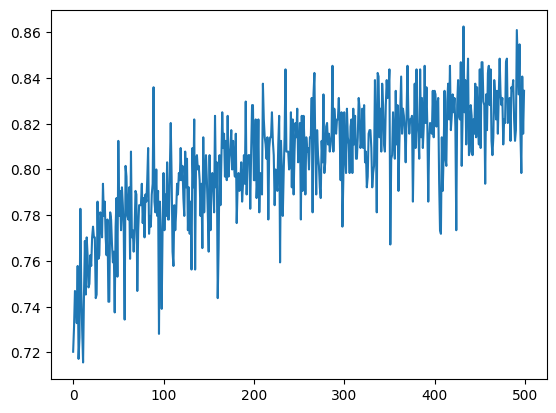

In [24]:
plt.plot(results.history['accuracy'])
print(max(results.history['accuracy']))

In [25]:
train_image_gen.class_indices

{'320': 0, '400': 1}

In [26]:
# import numpy as np
# import keras.utils as image
# t=0
# f=0
# r=180
# # r=150
# for i in range(r):
#     cnn_file = 'knn_mask_cashew/train/400/'+str(i)+'.png'
#     # cnn_file = 'knn_mask_cashew/train/320/'+str(i)+'.png'
#     cnn_img = image.load_img(cnn_file, target_size=(150, 150))
#     cnn_img = image.img_to_array(cnn_img)
#     cnn_img = np.expand_dims(cnn_img, axis=0)
#     cnn_img = cnn_img/255
#     prediction_prob = model.predict(cnn_img,verbose=0)
#     if (prediction_prob[0][0]>0.5):
#     # if (prediction_prob[0][0]<0.5):
#         # print('True')
#         t+=1
#     else:
#         print('False',i,prediction_prob[0][0])
#         f+=1
# print(t)
# print(f)
# print(t/(t+f))

In [27]:
mlt=1000000000

In [28]:
import numpy as np
import keras.utils as image

img_counter = 0
t=0
f=0

apath_c_dep="cashew_mask/cnn/deploy/"

# # # clas='210/'
# # # clas='240/'

# clas='320/'
# r=600 #'320/'

clas='400/'
r=680 #'400/'
    
for i in range(r):
    if(img_counter%20<10):
        pass
    elif(img_counter%20>=10 and img_counter%20<15):
        pass
    else:
        aimg_c_dep = apath_c_dep+clas+"{}.png".format(img_counter)

        cnn_img = image.load_img(aimg_c_dep, target_size=(150, 150))
        cnn_img = image.img_to_array(cnn_img)
        cnn_img = np.expand_dims(cnn_img, axis=0)
        cnn_img = cnn_img/255
        prediction_prob = model.predict(cnn_img,verbose=0)
        
        # if (prediction_prob[0][0]*mlt<0.5):
        if (prediction_prob[0][0]*mlt>0.5):
        #     print('True')
            t+=1
        else:
            # print('False',i,prediction_prob[0][0])
            f+=1
    img_counter += 1
    # print(prediction_prob[0][0]*mlt)
print(t)
print(f)
print(t,'/',(t+f),' = ',t/(t+f))

170
0
170 / 170  =  1.0


In [29]:
import numpy as np
import keras.utils as image

img_counter = 0
t=0
f=0

apath_c_dep="cashew_mask/cnn/deploy/"

# # # clas='210/'
# # # clas='240/'

clas='320/'
r=600 #'320/'

# clas='400/'
# r=680 #'400/'
    
for i in range(r):
    if(img_counter%20<10):
        pass
    elif(img_counter%20>=10 and img_counter%20<15):
        pass
    else:
        aimg_c_dep = apath_c_dep+clas+"{}.png".format(img_counter)

        cnn_img = image.load_img(aimg_c_dep, target_size=(150, 150))
        cnn_img = image.img_to_array(cnn_img)
        cnn_img = np.expand_dims(cnn_img, axis=0)
        cnn_img = cnn_img/255
        prediction_prob = model.predict(cnn_img,verbose=0)
        
        if (prediction_prob[0][0]*mlt<0.5):
        # if (prediction_prob[0][0]*mlt>0.5):
        #     print('True')
            t+=1
        else:
            # print('False',i,prediction_prob[0][0])
            f+=1
    img_counter += 1
    # print(prediction_prob[0][0]*100000)
print(t)
print(f)
print(t,'/',(t+f),' = ',t/(t+f))

10
140
10 / 150  =  0.06666666666666667


In [30]:
import numpy as np
import keras.utils as image

img_counter = 0
t=0
f=0

apath_c_dep="cashew_mask/knn/"

# # # clas='210/'
# # # clas='240/'

# clas='320/'
# r=600 #'320/'

clas='400/'
r=680 #'400/'
    
for i in range(r):
    aimg_c_dep = apath_c_dep+clas+"{}.png".format(img_counter)

    cnn_img = image.load_img(aimg_c_dep, target_size=(150, 150))
    cnn_img = image.img_to_array(cnn_img)
    cnn_img = np.expand_dims(cnn_img, axis=0)
    cnn_img = cnn_img/255
    prediction_prob = model.predict(cnn_img,verbose=0)

    # if (prediction_prob[0][0]*mlt<0.5):
    if (prediction_prob[0][0]*mlt>0.5):
    #     print('True')
        t+=1
    else:
        # print('False',i,prediction_prob[0][0])
        f+=1
    img_counter += 1
    
print(t)
print(f)
print(t,'/',(t+f),' = ',t/(t+f))

680
0
680 / 680  =  1.0


In [31]:
import numpy as np
import keras.utils as image

img_counter = 0
t=0
f=0

apath_c_dep="cashew_mask/knn/"

# # # clas='210/'
# # # clas='240/'

clas='320/'
r=600 #'320/'

# clas='400/'
# r=680 #'400/'
    
for i in range(r):
    aimg_c_dep = apath_c_dep+clas+"{}.png".format(img_counter)

    cnn_img = image.load_img(aimg_c_dep, target_size=(150, 150))
    cnn_img = image.img_to_array(cnn_img)
    cnn_img = np.expand_dims(cnn_img, axis=0)
    cnn_img = cnn_img/255
    prediction_prob = model.predict(cnn_img,verbose=0)

    if (prediction_prob[0][0]*mlt<0.5):
    # if (prediction_prob[0][0]*mlt>0.5):
    #     print('True')
        t+=1
    else:
        # print('False',i,prediction_prob[0][0])
        f+=1
    img_counter += 1
print(t)
print(f)
print(t,'/',(t+f),' = ',t/(t+f))

35
565
35 / 600  =  0.058333333333333334


In [ ]:
# 16
# 16
# 16
# 16
# 256

# 137
# 33
# 137 / 170  =  0.8058823529411765

# 128
# 22
# 128 / 150  =  0.8533333333333334

# 544
# 136
# 544 / 680  =  0.8

# 521
# 79
# 521 / 600  =  0.8683333333333333

In [ ]:
# 16
# 256

# 120
# 50
# 120 / 170  =  0.7058823529411765

# 130
# 20
# 130 / 150  =  0.8666666666666667

# 499
# 181
# 499 / 680  =  0.7338235294117647

# 511
# 89
# 511 / 600  =  0.8516666666666667

In [78]:
# 16
# 32
# 16
# 256

# 120
# 50
# 120 / 170  =  0.7058823529411765

# 130
# 20
# 130 / 150  =  0.8666666666666667

# 499
# 181
# 499 / 680  =  0.7338235294117647

# 511
# 89
# 511 / 600  =  0.8516666666666667

In [105]:
# 16
# 32
# 32
# 16
# 256

# 141
# 29
# 141 / 170  =  0.8294117647058824

# 119
# 31
# 119 / 150  =  0.7933333333333333

# 578
# 102
# 578 / 680  =  0.85

# 482
# 118
# 482 / 600  =  0.8033333333333333